In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments
using RLIntro, RLIntro.WindyGridWorld

In [2]:
env = WindyGridWorldEnv()
ns = length(observation_space(env))
na = length(action_space(env))

agent = Agent(
    π=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularQApproximator(;n_state=ns, n_action=na),
            optimizer=Descent(0.5)
        ),
        selector=EpsilonGreedySelector(0.1)
    ),
    buffer=episode_RTSA_buffer()
);

hook = StepsPerEpisode()
run(agent, env, StopAfterStep(8000);hook=hook)

Progress:   0%|█                                        |  ETA: 0:41:03
4m  TRAINING/STEP:  1
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
  TRAINING/STEP:  7999


StepsPerEpisode([895, 169, 217, 203, 77, 98, 144, 28, 81, 37  …  36, 18, 37, 19, 22, 22, 29, 28, 23, 22], 9, "TRAINING")

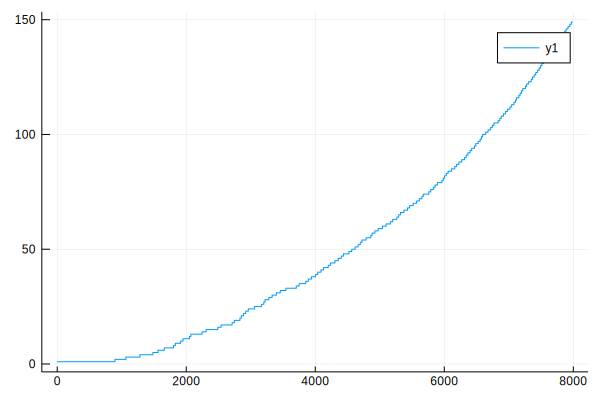

In [3]:
using Plots
plot([i for (i, x) in enumerate(hook.steps) for _ in 1:x])